In [5]:

import gensim

import gensim.downloader

Part 1: Word Embeddings

In [6]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [7]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

word = 'dance'

# Get the most similar words
similar_words = model.most_similar(word)

# Print the results
print(similar_words)

[('dancing', 0.8292789459228516), ('music', 0.7896507978439331), ('dances', 0.7714147567749023), ('musical', 0.7333230972290039), ('singing', 0.7319474816322327), ('dancers', 0.7275092005729675), ('folk', 0.7121564149856567), ('ballet', 0.7106929421424866), ('hop', 0.6938571929931641), ('pop', 0.6846777200698853)]


The result makes sense, since dance is similar to danving, music, singing, ballet, hop, pop, etc. 

In [8]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [9]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [10]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

# Load pre-trained Word2Vec model
model = gensim.downloader.load("glove-wiki-gigaword-100")

# Calculate "men's basketball" and "women's basketball" vectors
mens_basketball = model["men"] + (model["basketball"] - model["football"])
womens_basketball = model["women"] + (model["basketball"] - model["football"])

# Print similarity of words to men's and women's basketball vectors
print("Similarity to Men's Basketball:")
print(model.most_similar(mens_basketball))

print("\nSimilarity to Women's Basketball:")
print(model.most_similar(womens_basketball))


Similarity to Men's Basketball:
[('men', 0.8600196838378906), ('women', 0.7825490832328796), ('girls', 0.6129587888717651), ('pair', 0.6014708876609802), ('shooting', 0.5971193313598633), ('athletes', 0.5901820659637451), ('pairs', 0.5701221823692322), ('woman', 0.5597800612449646), ('boys', 0.5560290217399597), ('others', 0.5513535737991333)]

Similarity to Women's Basketball:
[('women', 0.8909062147140503), ('men', 0.733385443687439), ('girls', 0.6670671701431274), ('athletes', 0.6205196976661682), ('children', 0.618165910243988), ('female', 0.6117355227470398), ('woman', 0.5904080867767334), ('male', 0.586085855960846), ('mothers', 0.5752666592597961), ('lesbians', 0.5655148029327393)]


There is a lot of bias here. Men's Basketball has more similar terms relating to the game - such as "shooting" or "pair." Women's Basketball has terms that are unrelated to the game at all, such as "children", "mothers", and "lesbians." I also noted the gendered terms of "male" and "female" only being prevelant in the Woman's Basketball results, which I interpret as the common tendency for people to degrade women by using these biological terms instead of just "men" and "women." 

Part 2: Visualization and Embeddings in Space

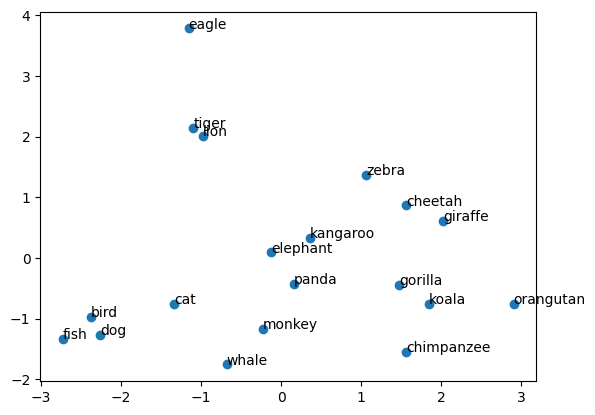

In [11]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

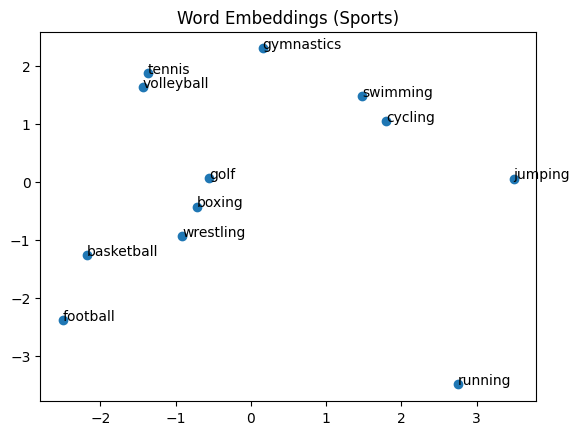

In [12]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

your_words = ["basketball", "football", "tennis", "golf", "swimming", "cycling", "running", "jumping", "boxing", "wrestling", "gymnastics", "volleyball"]

your_X = [model[word] for word in your_words]
your_pca = PCA(n_components=2)
your_X_pca = your_pca.fit_transform(your_X)

plt.scatter(your_X_pca[:, 0], your_X_pca[:, 1])
for i, word in enumerate(your_words):
    plt.annotate(word, (your_X_pca[i, 0], your_X_pca[i, 1]))
plt.title("Word Embeddings (Sports)")
plt.show()


What I notice:

Team sports (basketball, football, volleyball) tend to cluster separately from individual sports (golf, boxing, wrestling). <br>
Sports with similar physical demands or movement patterns (swimming & cycling, tennis & volleyball) group together. <br>
Sports with unique requirements (gymnastics, jumping) stand out as distinct. <br>

In [13]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


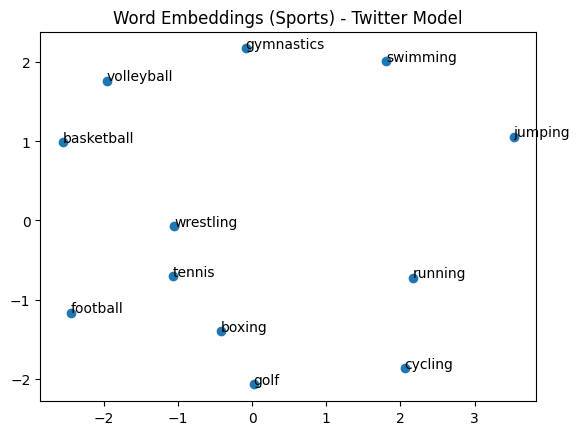

In [14]:
words = ["basketball", "football", "tennis", "golf", "swimming", "cycling", "running", "jumping", "boxing", "wrestling", "gymnastics", "volleyball"]

# Extract word embeddings
twitter_X = [twitter_model[word] for word in words]

# Perform PCA to reduce dimensionality
twitter_pca = PCA(n_components=2)
twitter_X_pca = twitter_pca.fit_transform(twitter_X)

# Visualize word embeddings
plt.scatter(twitter_X_pca[:, 0], twitter_X_pca[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (twitter_X_pca[i, 0], twitter_X_pca[i, 1]))
plt.title("Word Embeddings (Sports) - Twitter Model")
plt.show()

My observations:

- Team sports: Football, basketball, and volleyball cluster together, reflecting Twitter users' discussions around these sports. <br>
- Competitive sports: Wrestling, tennis, boxing, and golf form a loose cluster, indicating conversations around competitive individual sports.<br>
- Olympic and high-energy sports connection: The 5 sports near the top may represent Twitter users' interest in popular/Olympic sports and high-energy activities.<br>
- Endurance sports: Running and cycling's separatio and isolation suggests distinct conversations around these sports.

Comparison to Wiki Model:

Twitter model's word embeddings are more scattered and less grouped compared to the Wiki model. This may indicated weaker semantic associations between words. Twitter data includes more informal language, hashtags, and varying topics, which can make the word relationships less clear-cut. Twitter users also have diverse interests, opinions, and language styles, which can contribute to more dispersed word embeddings.

Part 3: Embedding reddit posts

In [15]:
import pandas as pd

#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [16]:
#using the code from project 1, clean the text and create a bag of words representation of the text

import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Clean and lemmatize the data csv

# Load Spacy language model
try:
    data_language_model = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading language model for the spaCy 'en_core_web_sm'...")
    spacy.cli.download("en_core_web_sm")
    data_language_model = spacy.load("en_core_web_sm")


# Function to clean data text
def clean_data(text):
    text = ' '.join(text.split())
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

# Function to lemmatize data text
def lemmatize_data(text):
    doc = data_language_model(text)
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
    return ' '.join(tokens)

# Clean and lemmatize the text
data['cleaned_text'] = data['text'].apply(clean_data)  
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize_data)

# Create a bag of words representation with count vectorizer
data_vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))

# Fit the vectorizer to the lemmatized text and transform it into a bag-of-words representation
data_bag_of_words = data_vectorizer.fit_transform(data['lemmatized_text'])

# Convert the bag-of-words representation into a DataFrame
data_bow_df = pd.DataFrame(data_bag_of_words.toarray(), columns=data_vectorizer.get_feature_names_out())



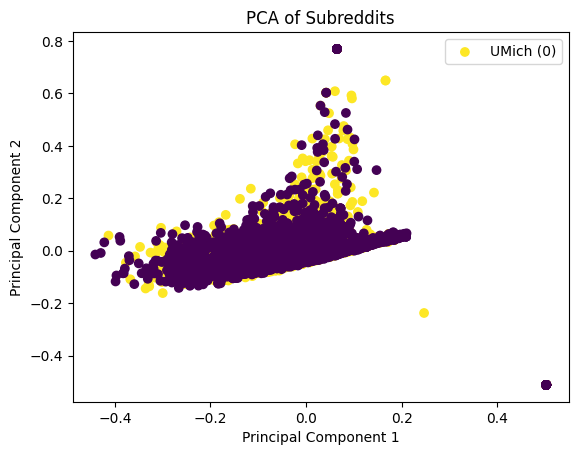

In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Read in uiuc csv
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

# Sample so we have even number of samples from each dataset
mich = mich.sample(n=4725)

# Assign labels based on origin subreddit of comment
uiuc['label'] = 1
mich['label'] = 0

# Concatenate data
data = pd.concat([uiuc, mich])

# Clean text data (assuming text column is named 'text')
data['text'] = data['text'].apply(lambda x: x.lower())  # Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.replace('\n', ' '))  # Remove newline characters
data['text'] = data['text'].apply(lambda x: ''.join(e for e in x if e.isalnum() or e.isspace()))  # Remove special characters


# Create bag-of-words representation using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])

# Plot PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Subreddits')
plt.legend(['UMich (0)', 'UIUC (1)'])
plt.show()

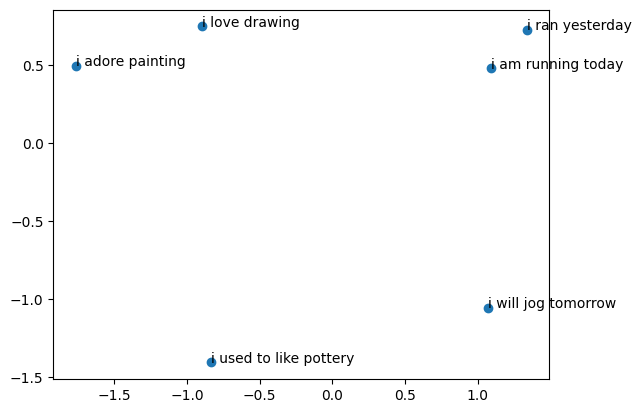

In [27]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

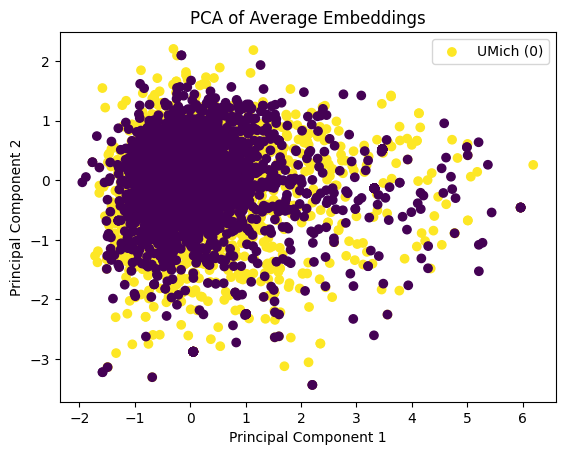

In [28]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gensim

# Load pre-trained Word2Vec model
model = gensim.downloader.load("glove-wiki-gigaword-100")

# Load data
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

# Sample data
mich = mich.sample(n=len(uiuc))

# Assign labels
uiuc['label'] = 1
mich['label'] = 0

# Concatenate data
data = pd.concat([uiuc, mich])

# Clean text data
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: ''.join(e for e in x if e.isalnum() or e.isspace()))

# Calculate average embedding
def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

# Calculate average embeddings
avg_embeddings = np.array([avg_embedding(text, model) for text in data['text']])

# Plot PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Average Embeddings')
plt.legend(['UMich (0)', 'UIUC (1)'])
plt.show()


This plot does look a lot different than the previous one - there is a lot more separation here. 

Part 4: HuggingFace and BERT

In [29]:
#Please wait until after next week to start

import torch
import transformers

# Use a pipeline as a high-level helper
from transformers import pipeline
#download bert model 
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

In [30]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class") 

[{'label': 'POS', 'score': 0.9923704862594604}]

In [36]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

# Faster model
pipe = pipeline("text-classification", model="distilbert-base-uncased")

# Classify sentiment
data['sentiment'] = data['text'].apply(lambda x: pipe(x[:512])[0]['label'])

# Map LABEL_0 to POSITIVE and LABEL_1 to NEGATIVE
data['sentiment'] = data['sentiment'].apply(lambda x: 'POSITIVE' if x == 'LABEL_0' else 'NEGATIVE')

# Report most common sentiment
most_common_sentiment = data['sentiment'].value_counts().idxmax()
print("Most Common Sentiment Label:", most_common_sentiment)

# Sentiment label counts
print("Sentiment Label Counts:")
print(data['sentiment'].value_counts())

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Most Common Sentiment Label: NEGATIVE
Sentiment Label Counts:
sentiment
NEGATIVE    8578
POSITIVE     872
Name: count, dtype: int64


In [47]:
#look at ten sample posts and labels; do you agree with all of them? 

# Display ten sample posts and labels
print(data[['text', 'sentiment']].sample(10))

                                                                                                                                                                            text  \
1684                                                                                                        there is no age requirement for self development and self betterment   
2879                                                                                                                           op is a professor ofc heshe is old enough to know   
6710                                                                                                                                                                transfer out   
3920                                                                                                                                         i wonder if itll ever get torn down   
3728               as a cca i would personally allow it at my dorm but that doesnt mean others would

I don't entirely agree with all the 10 samples. A lot of them are negative, but some of them can be understood as neutral or even helpful, even though they may be using negative language. 

However, I'm not surprised that these subreddits seem overwhelmingly negative.

In [48]:
#is the UIUC or Michigan subreddit more negative?

# Alternatively, use 'label' column if 'subreddit' doesn't exist
uiuc_data = data[data['label'] == 1]
mich_data = data[data['label'] == 0]

# Count negative sentiments
uiuc_negative = len(uiuc_data[uiuc_data['sentiment'] == 'NEGATIVE'])
mich_negative = len(mich_data[mich_data['sentiment'] == 'NEGATIVE'])

# Calculate negativity rates
uiuc_negativity_rate = uiuc_negative / len(uiuc_data) if uiuc_data.empty == False else 0
mich_negativity_rate = mich_negative / len(mich_data) if mich_data.empty == False else 0

print("UIUC Negativity Rate:", uiuc_negativity_rate)
print("Michigan Negativity Rate:", mich_negativity_rate)

# Determine which subreddit is more negative
if uiuc_negativity_rate > mich_negativity_rate:
    print("UIUC subreddit is more negative.")
elif mich_negativity_rate > uiuc_negativity_rate:
    print("Michigan subreddit is more negative.")
else:
    print("Both subreddits have equal negativity rates.")


UIUC Negativity Rate: 0.9178835978835979
Michigan Negativity Rate: 0.8975661375661376
UIUC subreddit is more negative.
